# Predicting Airb&b review scores

### Introduction
The project aimed to predict the review score of Airbnb listings in New York City, as well as finding out the important factors that has greater impact on the listing review scores. 

Multiple machine learning algorithms are used for the regression task and gridsearch with cross validation was performed to tune parameters in order to improve prediction accuracy. The interpretabilities of features are explored using coefficient and feature importances (impurity reduction criteria). The dataset is from the Inside Airbnb website (http://insideairbnb.com/get-the-data.html) After comparing the RMSE, it was found that the Random Forest Regression Model with parameters [bootstrap = True, max_depth = 10, max_features = 5, n_estimators = 200] has performed the best with an RMSE of 0.854

### Set environment and load dataset

In [1]:
### Setting Environment
import pandas as pd
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
### Load Dataset
import pandas as pd
df = pd.read_csv('listings_all.csv', sep=',')

In [48]:
df.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3647,https://www.airbnb.com/rooms/3647,20190912153101,2019-09-13,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,NaN,NaN,NaN,NaN,Upon arrival please have a legibile copy of yo...,NaN,NaN,https://a0.muscache.com/im/pictures/838341/9b3...,NaN,4632,https://www.airbnb.com/users/show/4632,Elisabeth,2008-11-25,"New York, New York, United States",Make Up Artist National/ (Website hidden by Ai...,a few days or more,0%,NaN,f,https://a0.muscache.com/im/users/4632/profile_...,https://a0.muscache.com/im/users/4632/profile_...,Harlem,1.0,1.0,"['email', 'phone', 'google', 'reviews', 'jumio...",t,t,"New York, NY, United States",Harlem,Harlem,Manhattan,New York,NY,10027,New York,"New York, NY",US,United States,40.80902,-73.94190,t,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",NaN,$150.00,NaN,NaN,$200.00,$75.00,2,$20.00,3,7,3,3,7,7,3.0,7.0,37 months ago,t,30,60,90,365,2019-09-13,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,1,0,1,0,NaN
1,3831,https://www.airbnb.com/rooms/3831,20190912153101,2019-09-13,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,NaN,B52 bus for a 10-minute ride to downtown Brook...,You will have exclusive use of and access to: ...,"We'll be around, but since you have the top fl...",Smoking - outside please; pets allowed but ple...,NaN,NaN,https://a0.muscache.com/im/pictures/e49999c2-9...,NaN,4869,https://www.airbnb.com/users/show/4869,LisaRoxanne,2008-12-07,"New York, New York, United States",Laid-back bi-coastal actor/professor/attorney.,within an hour,92%,NaN,f,https://a0.muscache.com/im/users/4869/profile_...,https://a0.muscache.com/im/users/4869/profile_...,Clinton Hill,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Brooklyn, NY, United States",Brooklyn,Clinton Hill,Brooklyn,Brooklyn,NY,11238,New York,"Brooklyn, NY",US,United States,40.68514,-73.95976,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,W

### Dealing with missing values and drop irrelavant features

In [4]:
df_missing = df.isna()
df_missing.head()
df_num_missing = df_missing.sum()
df_num_missing
missing_percentage = df_num_missing / len(df)

## Check missing value percentage
missing_percentage
df_new = list(zip(df.columns, missing_percentage))
type(df_new)
df_new
dropl = []
for c, p in df_new:
    if p>0.05:
        dropl.append(c)

### Dropped features : 1)Irrelevant, 2)Duplicate, 3)No variance 4)More than 5% NAs

dropl
drop0 = dropl[:22]+dropl[29:]
drop0
df

airbnb_df = df.drop(columns=drop0+['experiences_offered', 'host_location','calendar_updated','has_availability',\
                                  'host_url','listing_url','picture_url','host_thumbnail_url','host_picture_url',\
                                  'scrape_id', 'last_scraped','summary', 'description','id', 'name', 'host_name', \
                                   'host_id','host_listings_count', 'host_verifications','street', 'neighbourhood',\
                                   'neighbourhood_cleansed','neighbourhood_group_cleansed', 'city', 'state', \
                                   'zipcode',  'market','smart_location', 'country_code', 'country', 'latitude', \
                                   'longitude', 'minimum_minimum_nights', 'maximum_minimum_nights',\
                                   'minimum_maximum_nights', 'maximum_maximum_nights','minimum_nights_avg_ntm', \
                                   'maximum_nights_avg_ntm', 'availability_30', 'availability_60','availability_90',\
                                   'availability_365', 'number_of_reviews_ltm','review_scores_rating',\
                                   'review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin',\
                                   'review_scores_communication','review_scores_location', 'amenities',\
                                   'calculated_host_listings_count_entire_homes','guests_included',\
                                   'calculated_host_listings_count_private_rooms','calculated_host_listings_count',\
                                   'calculated_host_listings_count_shared_rooms', 'calendar_last_scraped',\
                                  'requires_license','is_business_travel_ready'])
airbnb_df.shape
### Drop
airbnb = airbnb_df.dropna()
airbnb.shape
airbnb.columns

Index(['host_since', 'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'price', 'extra_people', 'minimum_nights',
       'maximum_nights', 'number_of_reviews', 'review_scores_value',
       'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification'],
      dtype='object')

### Data Transformations and feature engineering

In [5]:
### Calculate host_days
airbnb['host_since'] = pd.to_datetime(airbnb['host_since'])
rt = pd.to_datetime('2019-09-12')
airbnb['host_days'] = rt - airbnb['host_since']
airbnb[:5]
airbnb['n_host_days'] =  airbnb['host_days'].dt.days
airbnb = airbnb.drop(columns='host_since')
airbnb = airbnb.drop(columns='host_days')

In [6]:
### Recoding property type by binning them into only 3 categories
airbnb['property_type'].value_counts()
def recoding(value):
    if value not in ['House', 'Apartment']:
        return 'Other'
    return value
airbnb['property_type'] = airbnb['property_type'].apply(recoding)
airbnb['property_type'].value_counts()

Apartment    29443
Other         4994
House         3243
Name: property_type, dtype: int64

In [7]:
### Bining Cancellation_policy
airbnb['cancellation_policy'].value_counts()

def recoding2(value):
    if value not in ['moderate', 'flexible']:
        return 'strict'
    return value

airbnb['cancellation_policy'] = airbnb['cancellation_policy'].apply(recoding2)

In [8]:
## Removing dollar sign for some features
airbnb['price'] = airbnb['price'].str.replace('$', '')
airbnb['price'] = airbnb['price'].str.replace(',', '')
airbnb['price'] = airbnb['price'].astype(float)
airbnb['extra_people'] = airbnb['extra_people'].str.replace('$', '')
airbnb['extra_people'] = airbnb['extra_people'].str.replace(',', '')
airbnb['extra_people'] = airbnb['extra_people'].astype(float)

In [9]:
airbnb.head(5)

,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,n_host_days
1,f,1.0,t,t,t,Other,Entire home/apt,3,1.0,1.0,4.0,Real Bed,89.0,0.0,1,730,279,9.0,f,moderate,f,f,3931
3,f,1.0,t,f,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,200.0,100.0,3,21,75,9.0,f,moderate,t,t,3874
5,f,1.0,t,f,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,79.0,12.0,2,14,443,8.0,f,strict,f,f,3845
6,f,1.0,t,t,t,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,79.0,0.0,2,14,118,10.0,f,flexible,t,t,3871
7,f,1.0,t,t,t,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,116.0,15.0,30,365,94,9.0,f,strict,f,f,3870


#### One-hot encoding, removing outliers, scaleing data frame

In [10]:
### Conducting one-hot encoding for 
colist = airbnb.select_dtypes('object')
for column in colist:
    oh = pd.get_dummies(airbnb[column],prefix=[column], drop_first = True)
    airbnb = airbnb.join(oh)
    airbnb = airbnb.drop(column, axis =1)

airbnb[:5].shape

(5, 30)

In [11]:
### Cache dummy variables that does not needed to be Standard_Scaled
airbnb_label = airbnb['review_scores_value']
airbnb_target = airbnb_label.to_frame()
airbnb_dummy = airbnb[airbnb.columns[12:30]]
airbnb_dummy[:5]
airbnb = airbnb.drop(columns = ['review_scores_value'])
airbnb = airbnb.drop(airbnb.columns[11: 30], axis=1)

In [12]:
### Removing outliers by winsorize dataframe 
from scipy import stats
import numpy as np
from scipy.stats import mstats

def winsorize_s(s):
    q = s.quantile([0.01, 0.99])
    if isinstance(q, pd.Series) and len(q) == 2:
        s[s < q.iloc[0]] = q.iloc[0]
        s[s > q.iloc[1]] = q.iloc[1]
    return s

def winsorize_ab(df):
    return df.apply(winsorize_s, axis=0)

winsorize_ab(airbnb)

,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,extra_people,minimum_nights,maximum_nights,number_of_reviews,n_host_days
1,1.0,3,1.0,1.0,4.0,89.0,0.0,1,730,236,3470
3,1.0,2,1.0,1.0,1.0,200.0,100.0,3,21,75,3470
5,1.0,2,1.0,1.0,1.0,79.0,12.0,2,14,236,3470
6,1.0,1,1.0,1.0,1.0,79.0,0.0,2,14,118,3470
7,1.0,2,1.0,1.0,1.0,116.0,15.0,30,365,94,3470
...,...,...,...,...,...,...,...,...,...,...,...
48094,8.0,2,2.0,1.0,0.0,85.0,85.0,1,1125,1,1242
48095,8.0,2,2.0,1.0,2.0,85.0,85.0,1,1125,1,1242
48097,8.0,2,2.0,1.0,2.0,85.0,85.0,1,1125,2,1242
48144,1.0,2,1.0,1.0,1.0,99.0,0.0,1,30,1,1188


In [13]:
### Scale non-dummy variables
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(airbnb)
scaled_features_airbnb = pd.DataFrame(scaled_features, index=airbnb.index, columns=airbnb.columns)
### Combine with dummy variables
airbnb_scaled = scaled_features_airbnb.join(airbnb_dummy)
airbnb_scaled[:5]

,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,extra_people,minimum_nights,maximum_nights,number_of_reviews,n_host_days,['host_is_superhost']_t,['host_has_profile_pic']_t,['host_identity_verified']_t,['is_location_exact']_t,['property_type']_House,['property_type']_Other,['room_type']_Hotel room,['room_type']_Private room,['room_type']_Shared room,['bed_type']_Couch,['bed_type']_Futon,['bed_type']_Pull-out Sofa,['bed_type']_Real Bed,['instant_bookable']_t,['cancellation_policy']_moderate,['cancellation_policy']_strict,['require_guest_profile_picture']_t,['require_guest_phone_verification']_t
1,-0.232345,0.070495,-0.371801,-0.246669,2.411096,-0.447871,-0.751020,-0.535777,0.280567,4.490302,2.163635,0,1,1,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0
3,-0.232345,-0.504825,-0.371801,-0.246669,-0.549380,0.632163,4.089066,-0.282692,-1.048786,0.978093,2.163635,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1
5,-0.232345,-0.504825,-0.371801,-0.246669,-0.549380,-0.545172,-0.170210,-0.409235,-1.061911,4.490302,2.163635,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0
6,-0.232345,-1.080145,-0.371801,-0.246669,-0.549380,-0.545172,-0.751020,-0.409235,-1.061911,1.916137,2.163635,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1
7,-0.232345,-0.504825,-0.371801,-0.246669,-0.549380,-0.185160,-0.025007,3.133955,-0.403797,1.392577,2.163635,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0


## Modeling
Predict the review scores using machine learning models and tune parameters using Root Mean Squared Error (RMSE)

### Linear Regression

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(airbnb_scaled, airbnb_label, test_size=0.33\
                                                    , random_state=42)

In [15]:
airbnb_scaled.to_csv('airbnb_scaled.csv', sep='\t', encoding='utf-8', index=False)
airbnb_target.to_csv('airbnb_target.csv', sep='\t', encoding='utf-8', index=False )

In [16]:
# Linear Regression with 8 fold validation on Training Set, having MSE as score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit, cross_val_score, GridSearchCV
kf = KFold(n_splits=8, shuffle = False , random_state=42)
cv = kf
lr = LinearRegression()
results = cross_val_score(lr, X_train, y_train, scoring='neg_mean_squared_error', cv=cv)
### result is RMSE
import statistics
import math
rmse_lr = math.sqrt(abs(statistics.mean(results)))
rmse_lr
##### Train set cross validation rmse 0.86646


0.8664620700744347

In [17]:
### After looking at cross validation results (rmse), Train the model and make predictions on test set
lr_model = lr.fit(X_train, y_train)
predictions_lr = lr_model.predict(X_test)
y_test
y_test_n = y_test.reset_index(drop=True)
y_test_n

0        10.0
1        10.0
2        10.0
3         9.0
4        10.0
         ... 
12430     9.0
12431    10.0
12432     9.0
12433     9.0
12434     9.0
Name: review_scores_value, Length: 12435, dtype: float64

### linear regression model evaluation

In [18]:
### Visualize prediction performace
import matplotlib.pyplot as plt
plt.xlabel('Trure Values')
plt.ylabel('Predictions')
plt.scatter(predictions_lr,y_test_n)


In [19]:
#### Calcualting TEST rmse
error= y_test_n - predictions_lr
rmse_lr_test = math.sqrt(sum(np.square(error))/len(error))
rmse_lr_test
#### TEST rmse 0.9061

0.9061002263891066

### Regularized regression (Ridge regression)

In [20]:
# Linear Regression with Ridge penalty, 8 fold validation on Training Set, having MSE as score
from sklearn.linear_model import Ridge
cv = kf
rr = Ridge(alpha=0.01)
results_rr = cross_val_score(rr, X_train, y_train, scoring='neg_mean_squared_error', cv=cv)
results_rr
rmse_rr = math.sqrt(abs(statistics.mean(results_rr)))
rmse_rr
##### Train set cross validation rmse 0.86646, almost the same as lr

0.8664619717660494

Text(0, 0.5, 'Predictions')

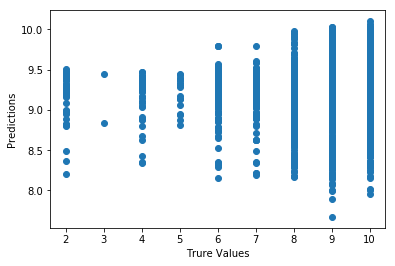

In [21]:
### Fit Ridge regression, predict and visualize performance
rr_model = rr.fit(X_train, y_train)

predictions_rr = rr_model.predict(X_test)

plt.scatter(y_test, predictions_rr)
plt.xlabel('Trure Values')
plt.ylabel('Predictions')

In [22]:
error_rr= y_test_n - predictions_rr
rmse_rr_test = math.sqrt(sum(np.square(error_rr))/len(error_rr))
rmse_rr_test
### Test rmse 0.9061, same as linear regression

0.9061000558078364

### Tuning Ridge Regression with Grid Search

In [23]:
# Grid Search for Ridge
from sklearn.model_selection import GridSearchCV
rr = Ridge()
param_grid= {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20]}
grid_rr = GridSearchCV(rr, param_grid, cv=cv, scoring='neg_mean_squared_error')


grid_rr.fit(X_train, y_train)

print('best score: ',grid_rr.best_score_)

print('best rmse: ', math.sqrt(abs(grid_rr.best_score_)))

print('best parameter: ',grid_rr.best_params_)

print('best estimator: ',grid_rr.best_estimator_)

best score:  -0.7506812567740933
best rmse:  0.8664186382887278
best parameter:  {'alpha': 10}
best estimator:  Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


In [24]:
## Calculating test RMSE using tuned Ridge Regressor
prediction_rr_tuned = grid_rr.predict(X_test)

errorrr= y_test_n - prediction_rr_tuned
rmse_rr_tune = math.sqrt(sum(np.square(errorrr))/len(errorrr))
rmse_rr_tune
### Train set RMSE 0.905975804831414 compared to initial 0.9061000558078364

0.905975804831414

In [25]:
## Takes about half minutes to run 
from sklearn.ensemble import RandomForestRegressor
num_trees = 100
cv = kf
rf = RandomForestRegressor(n_estimators=num_trees, max_features=5, random_state=42)
results_rf = cross_val_score(rf, X_train, y_train, scoring='neg_mean_squared_error', cv=cv)
results_rf
rmse_rf = math.sqrt(abs(statistics.mean(results_rf)))
rmse_rf

#### Train RMSE 0.86821 compare to 0.86646 with Ridge Regression

0.8682101057145215

Text(0, 0.5, 'Predictions')

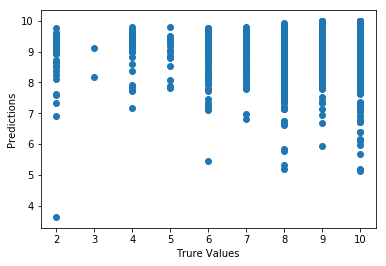

In [26]:
rf_model = rf.fit(X_train, y_train)

predictions_rf = rf.predict(X_test)

plt.scatter(y_test, predictions_rf)
plt.xlabel('Trure Values')
plt.ylabel('Predictions')

In [27]:
error_rf= y_test_n - predictions_rf
rmse_rf_test = math.sqrt(sum(np.square(error_rf))/len(error_rf))
rmse_rf_test

### Test RMSE 0.9049 compared with 0.9061 of Ridge Regression

0.9049476948529134

### Gradient Boost Regressor

In [28]:
### Takes about 1 minutes to run 
from sklearn.ensemble import GradientBoostingRegressor
cv = kf
gbr = GradientBoostingRegressor(n_estimators= 100, max_depth=5, learning_rate=0.1, random_state =42)
results_gbt = cross_val_score(gbr, X_train, y_train, scoring='neg_mean_squared_error', cv=cv)
rmse_gbt = math.sqrt(abs(statistics.mean(results_gbt)))
rmse_gbt

#### Train RMSE 0.858 compared to 0.86821 with Random Forest and 0.86646 with Ridge Regression

0.8582506092426705

0.8954099223060821

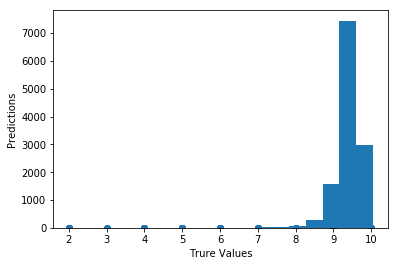

In [29]:
### Test set performance
gbr_model = gbr.fit(X_train, y_train)
predictions_gbr = gbr_model.predict(X_test)
plt.scatter(y_test, predictions_gbr)
plt.xlabel('Trure Values')
plt.ylabel('Predictions')
plt.hist(predictions_gbr)
error_gbr= y_test_n - predictions_gbr
rmse_gbr_test = math.sqrt(sum(np.square(error_gbr))/len(error_gbr))
rmse_gbr_test
### Test RMSE 0.8954 compared to RF of 0.9049 compared with Ridge Regression of 0.9061

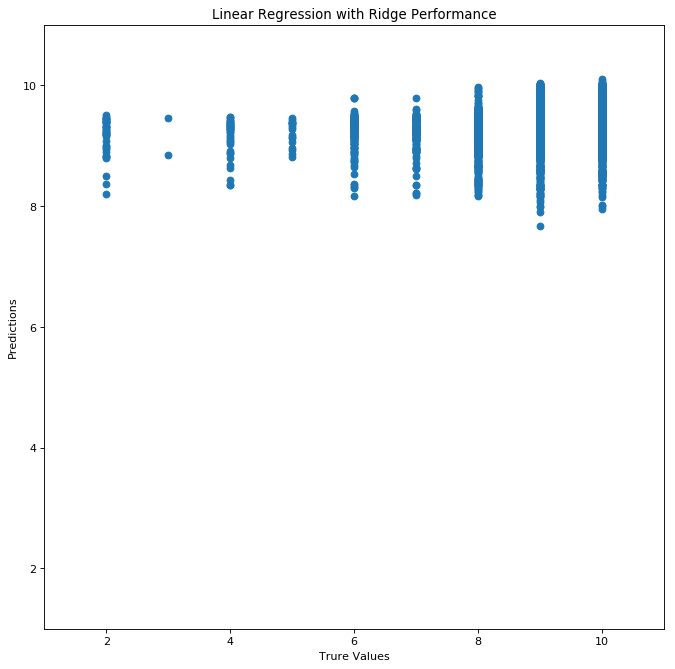

In [30]:
plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(y_test_n, predictions_rr)
plt.xlabel('Trure Values')
plt.ylabel('Predictions')
plt.ylim(1,11)
plt.xlim(1,11)
plt.title('Linear Regression with Ridge Performance')
plt.savefig('scatter1.pdf')

In [31]:
# Grid Search for Gradient Boost
model_gbt = GradientBoostingRegressor()
param_grid = {
    'learning_rate': [0.1, 0.5],
    'n_estimators': [100, 200],
    'max_depth': [2, 5],
    'max_features': [3, 5],
}
grid_gbt = GridSearchCV(model_gbt, param_grid, cv=10, scoring='neg_mean_squared_error')


In [32]:
grid_gbt.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.1, 0.5], 'n_estimators': [100, 200], 'max_depth': [2, 5], 'max_features': [3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [33]:
print('best score: ',grid_gbt.best_score_)

print('best rmse: ', math.sqrt(abs(grid_gbt.best_score_)))

print('best parameter: ',grid_gbt.best_params_)

print('best estimator: ',grid_gbt.best_estimator_)

best score:  -0.7294370860754832
best rmse:  0.8540708905445046
best parameter:  {'learning_rate': 0.1, 'max_depth': 2, 'max_features': 5, 'n_estimators': 200}
best estimator:  GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=5,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)


In [34]:
prediction_gbt = grid_gbt.predict(X_test)

In [35]:
errorgbt= y_test_n - prediction_gbt
rmse_gbt_tune = math.sqrt(sum(np.square(errorgbt))/len(errorgbt))
rmse_gbt_tune

0.8940841499060093

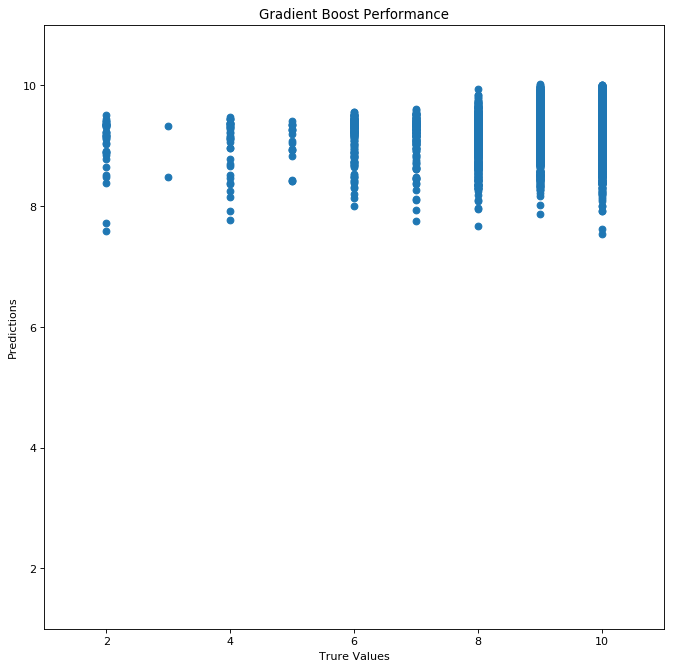

In [36]:
plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(y_test_n, prediction_gbt)
plt.xlabel('Trure Values')
plt.ylabel('Predictions')
plt.ylim(1,11)
plt.xlim(1,11)
plt.title('Gradient Boost Performance')
plt.savefig('scatter3.pdf')

### Random Forest

In [37]:
# Grid Search for Random Forest
param_grid = {
    'bootstrap': [True],
    'n_estimators': [64, 100, 200],
    'max_depth': [5, 10],
    'max_features': [3, 5, 10],
}
grid_rf = GridSearchCV(rf, param_grid, cv=cv, scoring='neg_mean_squared_error')

In [38]:
### This will take a long time to run
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=8, random_state=42, shuffle=False),
       error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'bootstrap': [True], 'n_estimators': [64, 100, 200], 'max_depth': [5, 10], 'max_features': [3, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [39]:
print('best score: ',grid_rf.best_score_)

print('best rmse: ', math.sqrt(abs(grid_rf.best_score_)))

print('best parameter: ',grid_rf.best_params_)

print('best estimator: ',grid_rf.best_estimator_)

best score:  -0.729955820047043
best rmse:  0.8543745197786758
best parameter:  {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 200}
best estimator:  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)


In [40]:
prediction_rf = grid_rf.predict(X_test)

In [41]:
errorrf= y_test_n - prediction_rf
rmse_rf_tune = math.sqrt(sum(np.square(errorrf))/len(errorrf))
rmse_rf_tune

0.8932579904302981

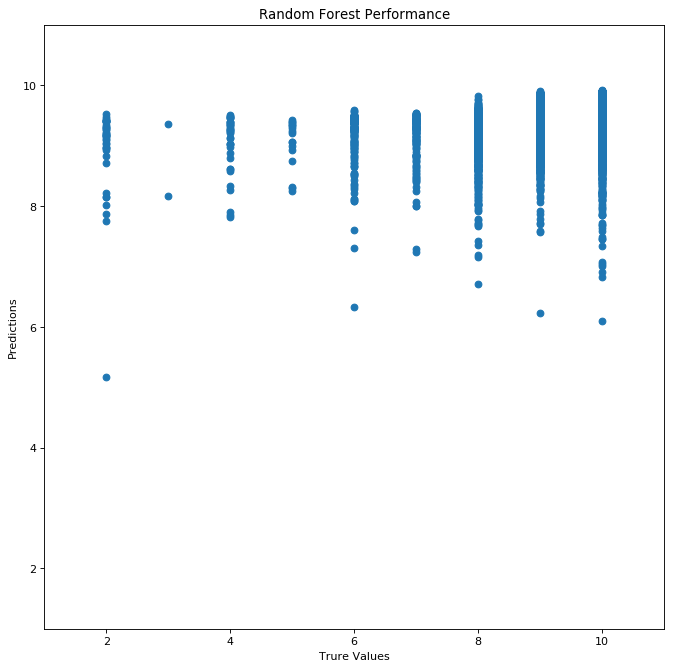

In [42]:
plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(y_test_n, prediction_rf)
plt.xlabel('Trure Values')
plt.ylabel('Predictions')
plt.ylim(1,11)
plt.xlim(1,11)
plt.title('Random Forest Performance')
plt.savefig('scatter2.pdf')

### Feature Importances

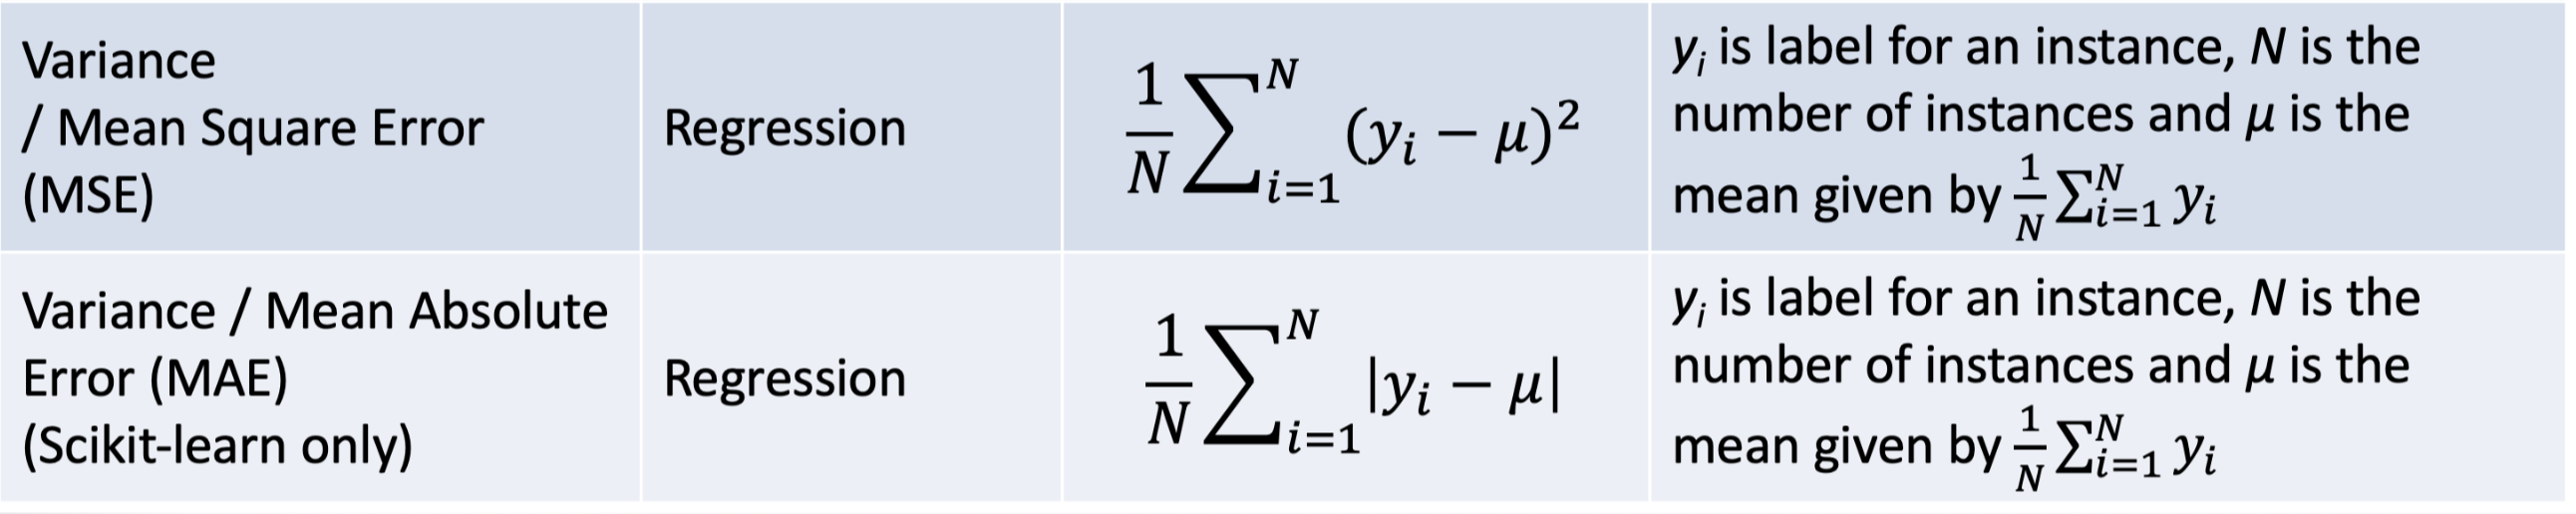

In [43]:
from IPython.display import Image
Image("Screen Shot 2019-12-14 at 5.15.29 PM.png")

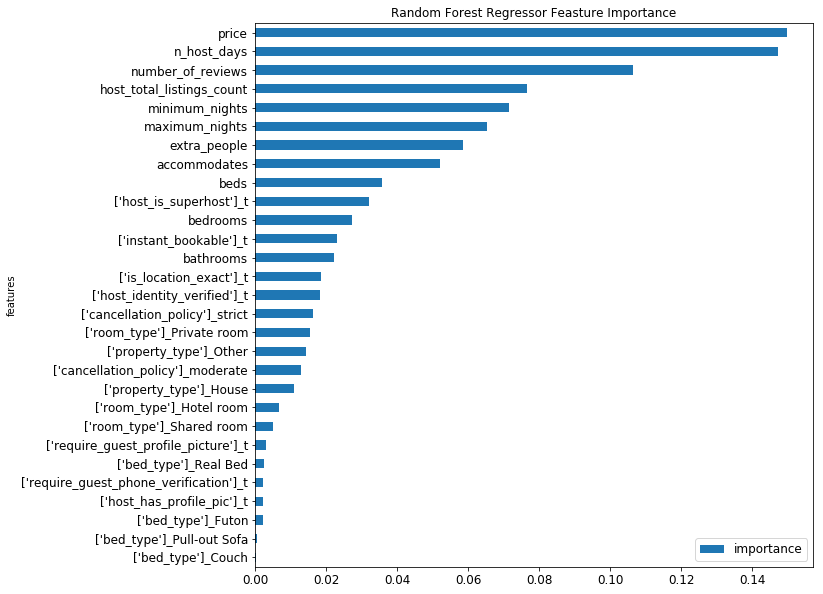

In [44]:
## Random Forest Feature Importance 
dfrf = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(rf.feature_importances_))], axis = 1)
dfrf.columns = ['features','importance']
dfrf_sort = dfrf.sort_values('importance', ascending = True)
fig2 = dfrf_sort.plot.barh(y='importance', x='features', rot=0,figsize=(10, 10), \
                           title ='Random Forest Regressor Feasture Importance', fontsize=12)
fig2.legend(loc='lower right', fontsize=12)
fig2.figure.savefig('bar2.pdf')

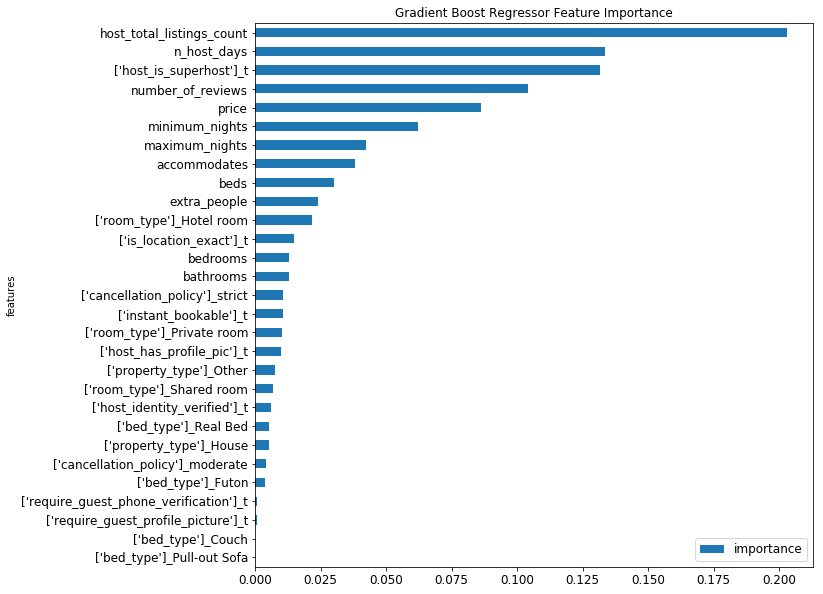

In [45]:
### Gradient Boost Regressor Feature Importance
dfgbtr = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(gbr.feature_importances_))], axis = 1)
dfgbtr.columns = ['features','importance']
dfgbtr_sort = dfgbtr.sort_values('importance', ascending = True)
fig3 = dfgbtr_sort.plot.barh(y='importance', x='features', rot=0,figsize=(10, 10),\
                             title ='Gradient Boost Regressor Feature Importance', fontsize=12)
fig3.legend(loc='lower right', fontsize=12)
fig3.figure.savefig('bar3.pdf')

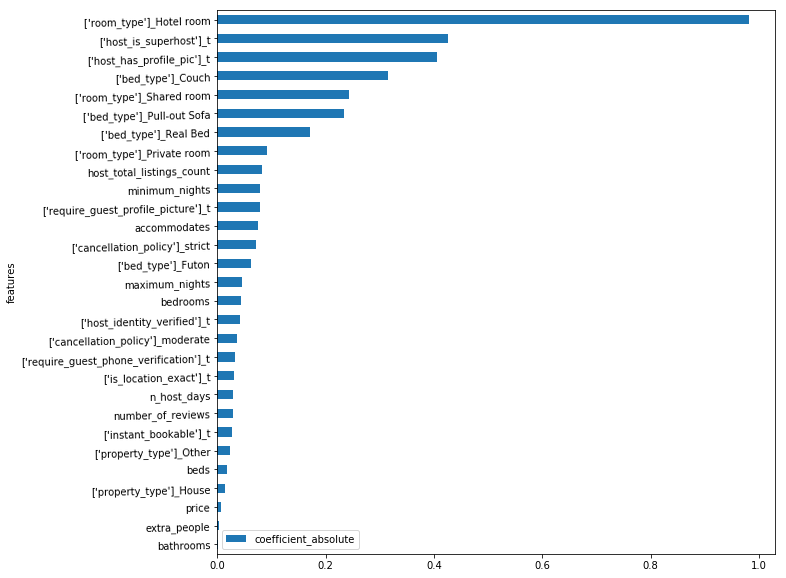

In [46]:
## Regularized Linear Regression Feature Importance
dfco = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(rr_model.coef_))], axis = 1)
dfco.columns = ['features','coefficient']
dfco['coefficient_absolute'] = dfco['coefficient'].abs()
dfco_sort = dfco.sort_values('coefficient_absolute', ascending = True)
dfco_sort.plot.barh(y='coefficient_absolute', x='features', rot=1,figsize=(10, 10))